1-Data Collection

The dataset used is the advertising Dataset from Kaggle
https://www.kaggle.com/datasets/ashydv/advertising-dataset

Importing Libraries

In [21]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error

Read Data

In [22]:
data=pd.read_csv('advertising.csv')

In [23]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         196 non-null    float64
 1   Radio      195 non-null    float64
 2   Newspaper  195 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


2-Data Cleaning

In [25]:
data.isnull().sum()

TV           4
Radio        5
Newspaper    5
Sales        0
dtype: int64

In [26]:
data_cleaned=data.fillna(data.median())


In [27]:
data_cleaned.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [28]:
data_cleaned.duplicated().sum()

0

In [29]:
data_cleaned.describe()

,TV,Radio,Newspaper,Sales
count,200.0000,200.000000,200.000000,200.000000
mean,146.4245,23.376000,30.606000,15.130500
std,84.7360,14.714189,21.693515,5.283892
min,0.7000,0.000000,0.300000,1.600000
25%,75.0000,10.075000,12.875000,11.000000
50%,148.5000,23.300000,25.600000,16.000000
75%,217.8750,36.525000,45.100000,19.050000
max,296.4000,49.600000,114.000000,27.000000


3-Data Analysis

EDA

<AxesSubplot: >

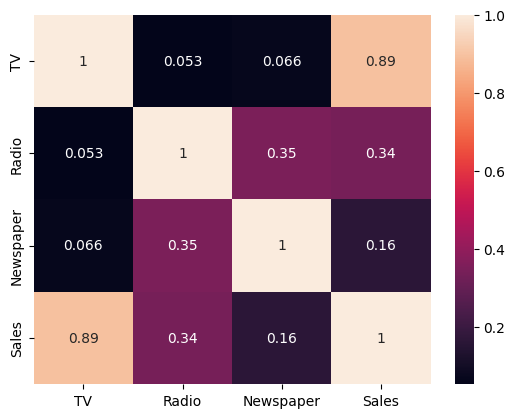

In [30]:
sns.heatmap(data_cleaned.corr(), annot=True)

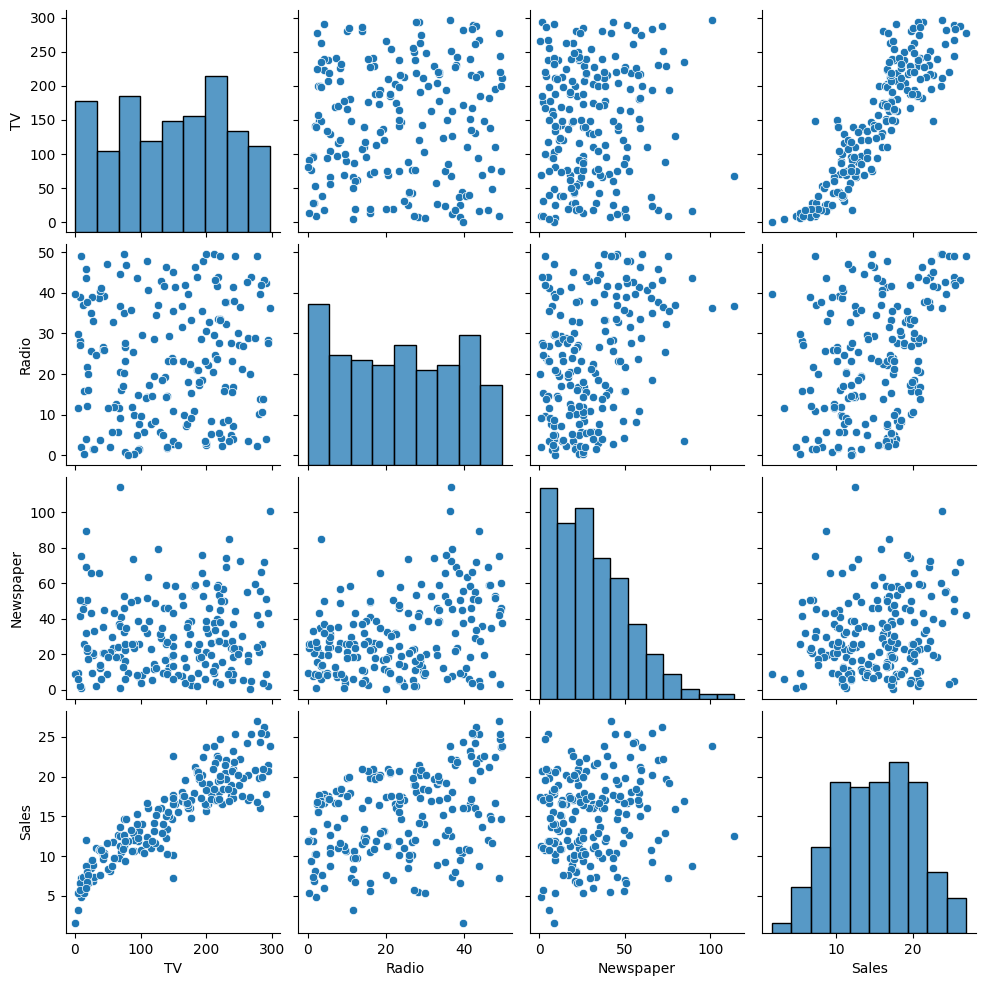

In [31]:
sns.pairplot(data_cleaned)

There seems to be stronger Relation between Tv advertising and sales compared to other advertisng

Hypothesis Testing

In [32]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(data_cleaned['TV'], data_cleaned['Sales'])
print("P-Value: ", p_value)

P-Value:  3.32155065517806e-70


In [33]:



t_stat, p_value = ttest_ind(data_cleaned['Radio'], data_cleaned['Sales'])
print("P-Value: ", p_value)

P-Value:  5.532278580889009e-13


P-value << 0.05 then the h(0) hypothesis failed
and the h(1) Hypothesis is Proved that there is a strong Relation between the Tv advertising and the Sales

Modeling

In [34]:
x = data_cleaned.drop(['Sales','Newspaper'],axis=1)
y = data_cleaned['Sales']

In [35]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


TRain Model

In [36]:
model= LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

Evaluating

Using Mse

In [37]:
# Predict on training data
y_train_pred = model.predict(x_train)

# Calculate MSE for training data
mse_train = mean_squared_error(y_train_pred, y_train)

print("MSE for Training Data:", mse_train)

MSE for Training Data: 3.3093818231535437


In [38]:
y_predected =model.predict(x_test)

mse= mean_squared_error( y_predected,y_test)
mse

3.0949415083724023

Using Mae

In [39]:
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_predected)

# Output the results
print(f'Mean Absolute Error on Training Set: {mae_train:.2f}')
print(f'Mean Absolute Error on Testing Set: {mae_test:.2f}')


Mean Absolute Error on Training Set: 1.32
Mean Absolute Error on Testing Set: 1.33


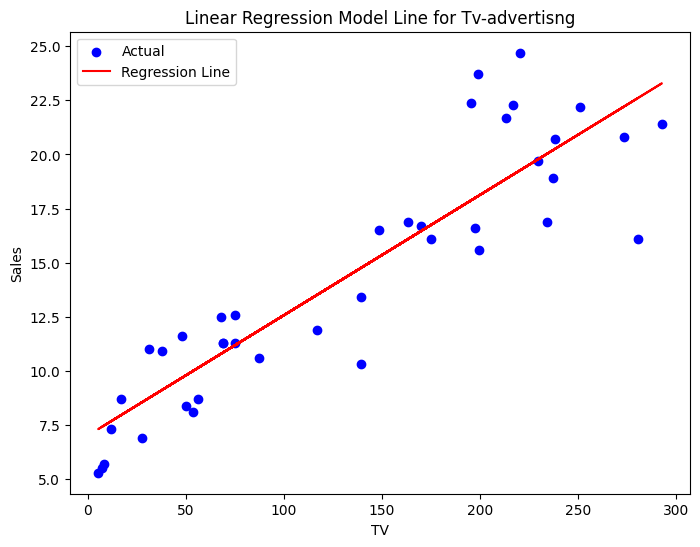

In [40]:
# Train a simple linear regression model using only 'Present_Price'
x_train_simple = x_train[['TV']]  # Only one feature
x_test_simple = x_test[['TV']]

model.fit(x_train_simple, y_train)
# Predictions for the simple linear regression
y_pred_simple = model.predict(x_test_simple)



# Scatter plot and regression line
plt.figure(figsize=(8, 6))

plt.scatter(x_test['TV'], y_test, color='blue', label='Actual')
plt.plot(x_test['TV'], y_pred_simple, color='red', label='Regression Line')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression Model Line for Tv-advertisng')
plt.legend()
plt.show()

##Summary

The Tv advertisng is strongly affecting the company sales

The radio advertisng is affecting the company sales too but not as much as the TV'S

The model is ready for deployment to predict the sales in the nesxt months

##Recomendation

Pioritize the TV advertising and work on increasing it


Try to improve the Radio advertising and incraese it step by step 

Gather Data about the newspaper advertising and analyze it to find patterns and make decisions to work on Improving it 